In [37]:
# read th information of a CSV and load into a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the csv file
df= pd.read_csv('A1-energy.txt',sep='	')
df.head()
print(df.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

<Axes: >

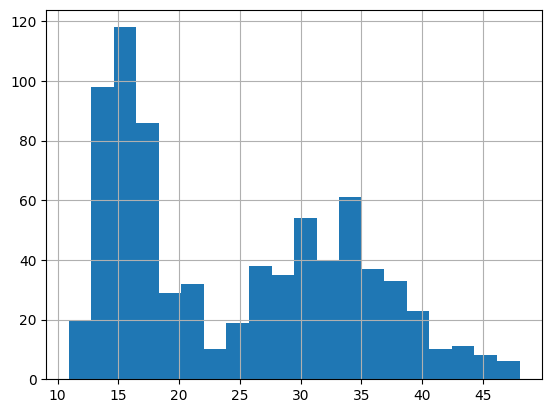

In [15]:
#plot a histogram of the 'temperatura media'
df['Y2'].hist(bins=20)


<Axes: >

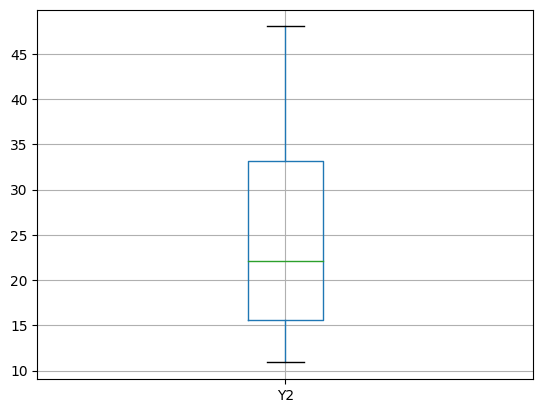

In [24]:
#plot a box whisker plot
df.boxplot(column='Y2')

In [13]:
# get the number of missing values
df.isnull().sum()
#print the number of columns and rows
print(df.shape)
#remove all the lines where all values are missing except 'provincia' and 'day'
df_all2=df.dropna(how='all',subset=['x1','x2','X3','X4','X5','X6','X7','X8','Y1','Y2'])
#df_all2=df_all.isna(....)
#print the number of columns and rows
print(df_all2.shape)

(451, 5)
(451, 5)


In [26]:
print(df.isnull().sum())
#replace the missing values with the mean of the column for tempratura media
#df_all2['fall'].fillna(df_all2['fall'].mode(),inplace=True)
#print(df_all2.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [28]:
#obtain all the values of the column and create a dictionary
#columnName=df['X1'].unique()
#transform the list to a dictionary
#dictionaryName={k:v for v,k in enumerate(columnName)}
#print(dictionaryName)

#df_all2['X1']=df_all2['X1'].map(dictionaryName)

#df_all2.head()

In [38]:
#Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default =(0,1)

#height_over_sea_level	fall	net	fall_flow	power_of_hydroelectrical_turbine
empty_df = pd.DataFrame()

#create a list of the features to be scaled

empty_df['X5']=df['X5']
empty_df['X6']=df['X6']
empty_df['X8']=df['X8']

empty_df['X1']= scaler.fit_transform(df[['X1']])
empty_df['X7']= scaler.fit_transform(df[['X7']])
empty_df['Y1']= scaler.fit_transform(df[['Y1']])
empty_df['Y2']= scaler.fit_transform(df[['Y2']])

empty_df['X2']= (df['X2']-df['X2'].mean())/df['X2'].std()
empty_df['X3']= (df['X3']-df['X3'].mean())/df['X3'].std()
empty_df['X4']= (df['X4']-df['X4'].mean())/df['X4'].std()

empty_df.to_csv('A1-energy-normalized.txt', index=False, sep='	')

empty_df.head()

,X5,X6,X8,X1,X7,Y1,Y2,X2,X3,X4
0,7.0,2,0,1.000000,0.0,0.257212,0.280905,-1.784712,-0.561586,-1.469119
1,7.0,3,0,1.000000,0.0,0.257212,0.280905,-1.784712,-0.561586,-1.469119
2,7.0,4,0,1.000000,0.0,0.257212,0.280905,-1.784712,-0.561586,-1.469119
3,7.0,5,0,1.000000,0.0,0.257212,0.280905,-1.784712,-0.561586,-1.469119
4,7.0,2,0,0.777778,0.0,0.399838,0.468085,-1.228438,0.000000,-1.197897
